In [1]:
!pip install -r requirements.txt

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [3]:
def plot_2d_clf_problem(X, y, h=None):
    assert X.shape[1] == 2, "Dataset is not two-dimentional"

    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50)

In [4]:
file_path1 = "./data/train.csv"
file_path2 = "./data/test.csv"

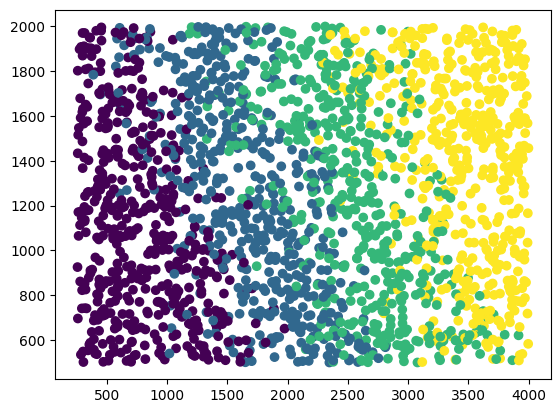

In [5]:
data = pd.read_csv(file_path1)

data_test = pd.read_csv(file_path2)

X = np.array(data[['ram', 'battery_power']])
y = np.array(data['price_range'])

X2 = np.array(data_test[['ram', 'battery_power']])

plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3840)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

X2 = mm.fit_transform(X2)


### KNN

In [6]:
from numpy.linalg import norm
from sklearn.metrics import accuracy_score, zero_one_loss

class KNN:
    def __init__(self, n_neighbors=3):
        self.k = n_neighbors
        self.X_train = []
        self.y_train = []

    def fit(self, X_train, y_train):
        if len(X_train) != len(y_train):
            print("X i Y are not of the same length!")
        self.X_train = X_train
        self.y_train = y_train
        return self

    def predict(self, X_test):
        preds = np.array([])
        for x in X_test:
            dist = norm(self.X_train - x, axis=1)
            ind = np.argsort(dist)
            top = ind[:min(len(ind), self.k)]

            ys = [self.y_train[i] for i in top]
            preds = np.append(preds, max(set(ys), key=ys.count))

        return preds

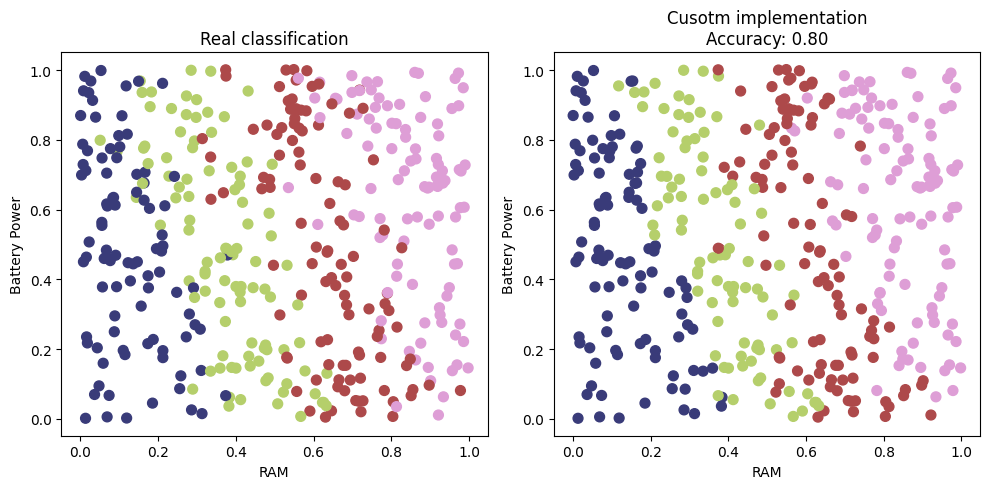

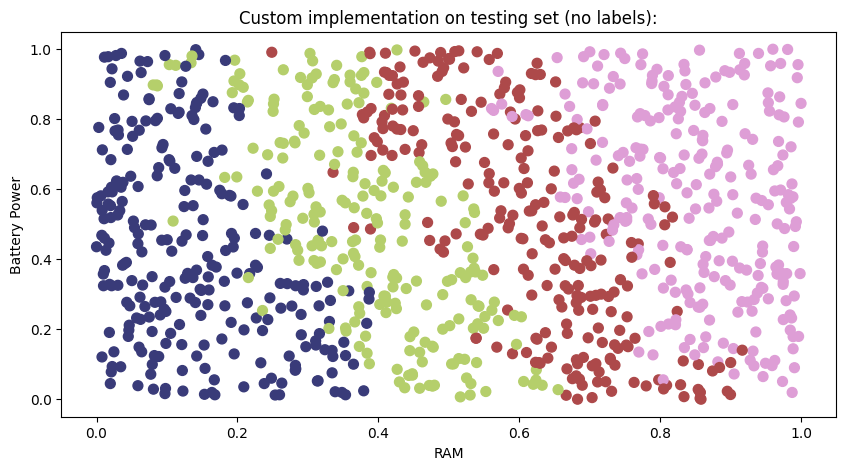

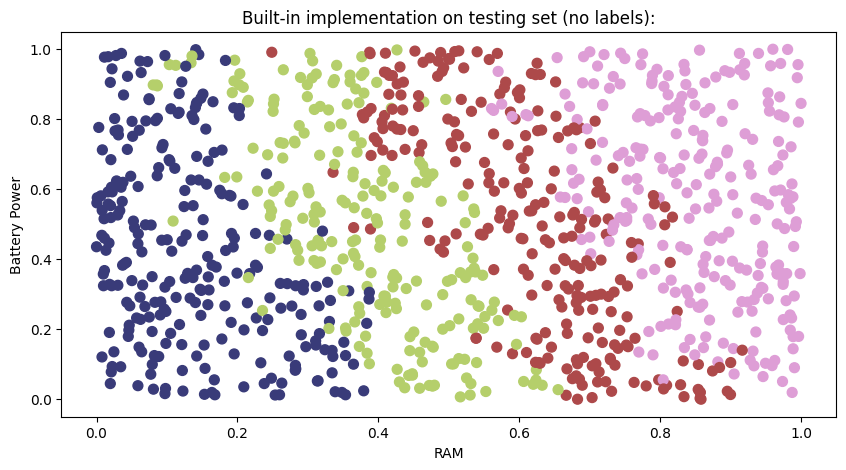

In [7]:
custom_knn = KNN(n_neighbors=3)
custom_knn.fit(X_train, y_train)
preds = custom_knn.predict(X_test)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
preds2 = model.predict(X_test)

acc_c = accuracy_score(y_test, preds)
acc_s = accuracy_score(y_test, preds2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title("Real classification")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title(f"Cusotm implementation\nAccuracy: {acc_c:.2f}")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.tight_layout()
plt.show()

preds = custom_knn.predict(X2)
preds2 = model.predict(X2)

plt.figure(figsize=(10, 5))

plt.scatter(X2[:, 0], X2[:, 1], c=preds, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title(f"Custom implementation on testing set (no labels):")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.show()

plt.figure(figsize=(10, 5))

plt.scatter(X2[:, 0], X2[:, 1], c=preds2, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title(f"Built-in implementation on testing set (no labels):")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.show()


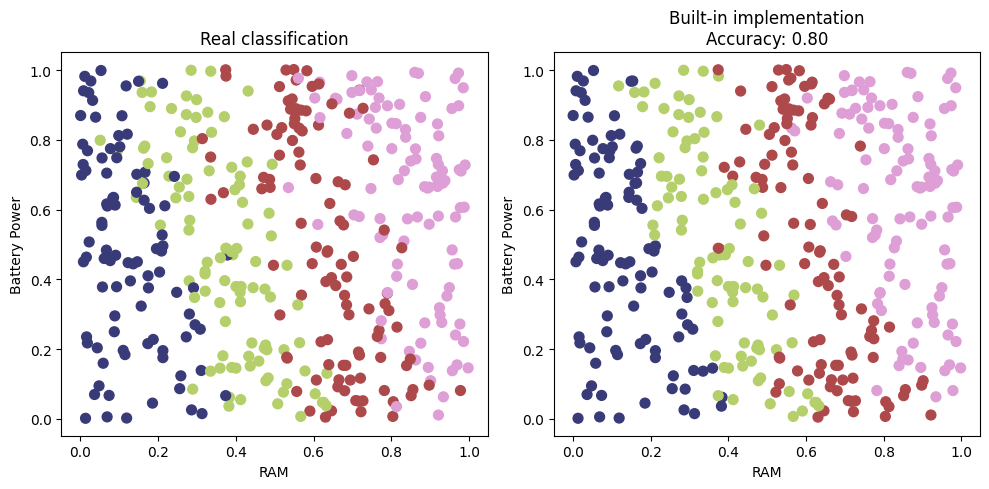

In [8]:
model = KNeighborsClassifier(algorithm="brute", n_neighbors=3)
model.fit(X_train, y_train)
predictions_sklearn = model.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title("Real classification")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions_sklearn, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title(f"Built-in implementation\nAccuracy: {accuracy_sklearn:.2f}")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.tight_layout()
plt.show()

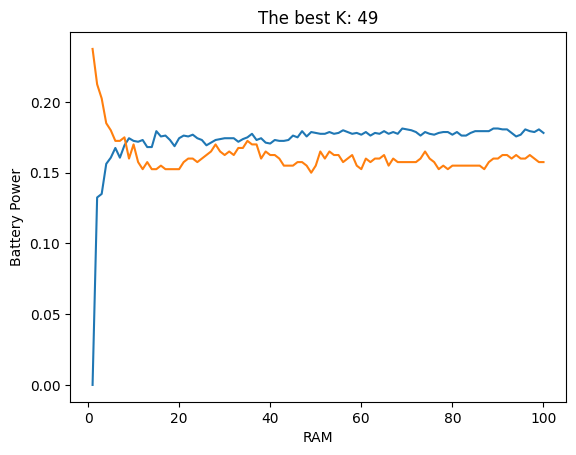

In [9]:
from sklearn.neighbors import KNeighborsClassifier

K = list(range(1, 101))

train = []
test = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train.append(1 - knn.score(X_train, y_train))
    test.append(1 - knn.score(X_test, y_test))

best_k = K[np.argmin(test)]

plt.plot(K, train, label="Train error")
plt.plot(K, test, label="Test error")
plt.title(f"The best K: {best_k}")
plt.xlabel("RAM")
plt.ylabel("Battery Power")
plt.show()

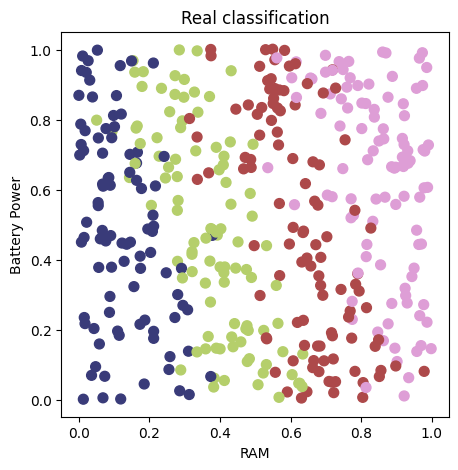

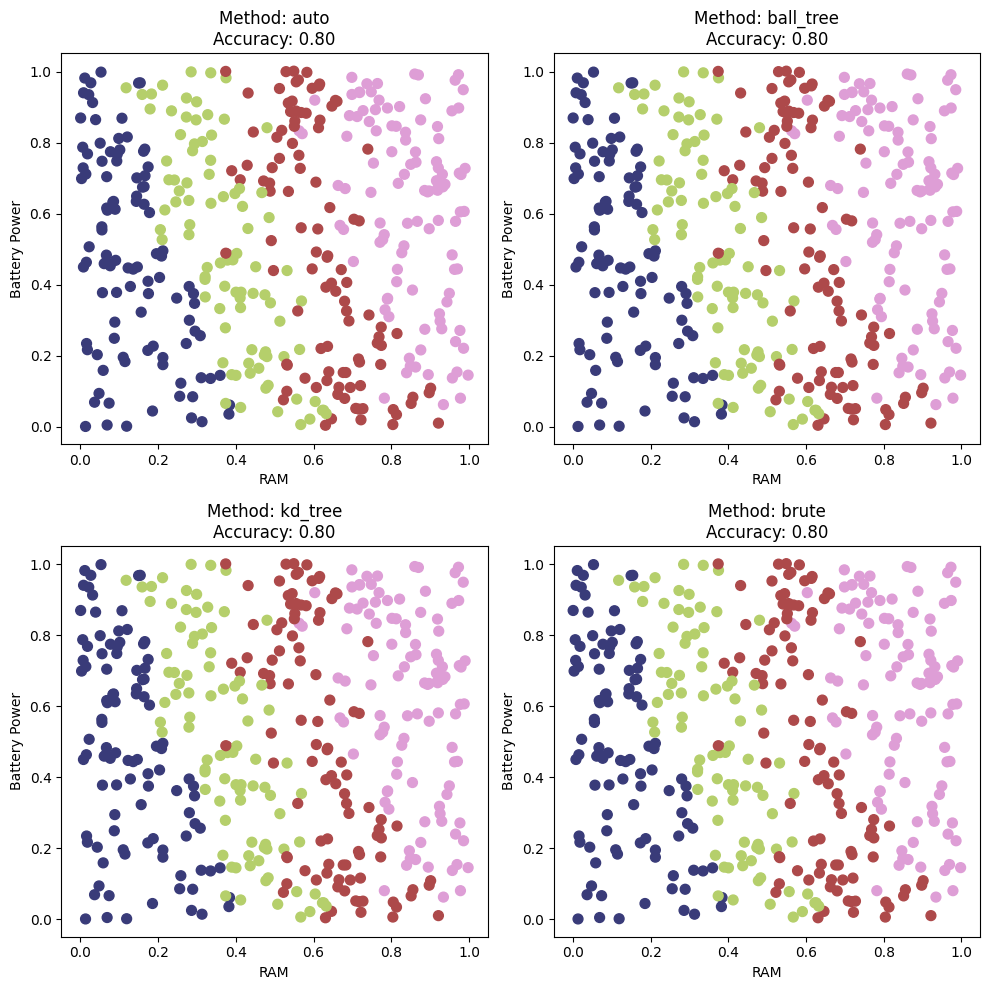

In [10]:
from sklearn.neighbors import KNeighborsClassifier

alg = ["auto", "ball_tree", "kd_tree", "brute"]

plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title("Real classification")
plt.xlabel("RAM")
plt.ylabel("Battery Power")
plt.show()

plt.figure(figsize=(10, 10))

for i, a in enumerate(alg):
    model = KNeighborsClassifier(algorithm=a, n_neighbors=3)
    model.fit(X_train, y_train)
    predictions_sklearn = model.predict(X_test)

    accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)

    plt.subplot(2, 2, i+1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions_sklearn, cmap=plt.cm.tab20b, marker='o', s=50)
    plt.title(f"Method: {a}\nAccuracy: {accuracy_sklearn:.2f}")
    plt.xlabel("RAM")
    plt.ylabel("Battery Power")

plt.tight_layout()
plt.show()

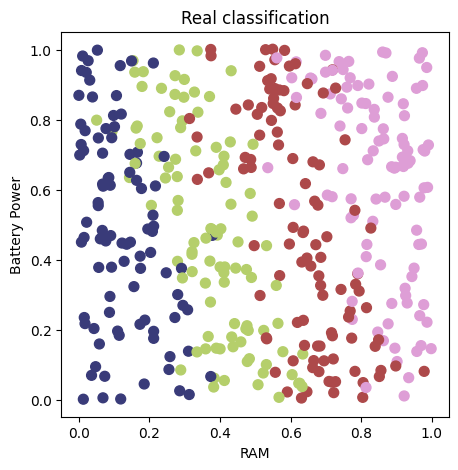

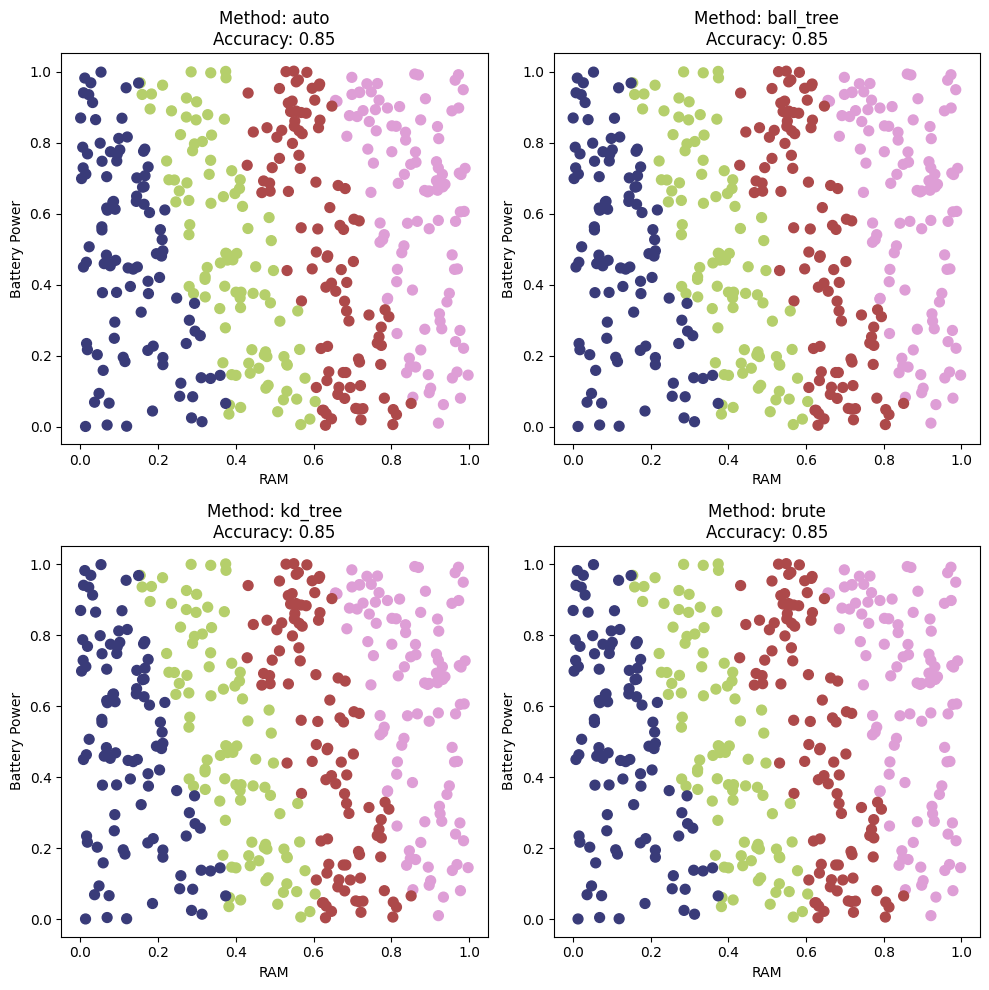

In [11]:
from sklearn.neighbors import KNeighborsClassifier

alg = ["auto", "ball_tree", "kd_tree", "brute"]

plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title("Real classification")
plt.xlabel("RAM")
plt.ylabel("Battery Power")
plt.show()

plt.figure(figsize=(10, 10))

for i, a in enumerate(alg):
    model = KNeighborsClassifier(algorithm=a, n_neighbors=best_k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)

    plt.subplot(2, 2, i+1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=preds, cmap=plt.cm.tab20b, marker='o', s=50)
    plt.title(f"Method: {a}\nAccuracy: {acc:.2f}")
    plt.xlabel("RAM")
    plt.ylabel("Battery Power")

plt.tight_layout()
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier

alg = ["auto", "ball_tree", "kd_tree", "brute"]

data_all = np.array(data)

data_all = data_all[:,0:20]

ys = np.array(data)[:,20]

X_tr, X_ts, y_tr, y_ts = train_test_split(data_all, ys, test_size=0.2, random_state=3840)

for i, a in enumerate(alg):
    model = KNeighborsClassifier(algorithm=a, n_neighbors=best_k)
    model.fit(X_tr, y_tr)
    preds = model.predict(X_ts)
    
    acc = accuracy_score(y_ts, preds)
    print(f"Method: {a}, Accuracy: {acc}")

Method: auto, Accuracy: 0.9175
Method: ball_tree, Accuracy: 0.9175
Method: kd_tree, Accuracy: 0.9175
Method: brute, Accuracy: 0.9175


In [13]:
from sklearn.neighbors import KNeighborsClassifier

alg = ["auto", "ball_tree", "kd_tree", "brute"]

data_all = np.array(data[['ram', 'battery_power', 'px_height', 'px_width']])

ys = np.array(data)[:,20]

X_tr, X_ts, y_tr, y_ts = train_test_split(data_all, ys, test_size=0.2, random_state=3840)

for i, a in enumerate(alg):
    model = KNeighborsClassifier(algorithm=a, n_neighbors=best_k)
    model.fit(X_tr, y_tr)
    preds = model.predict(X_ts)
    
    acc = accuracy_score(y_ts, preds)
    print(f"Method: {a}, Accuracy: {acc}")

Method: auto, Accuracy: 0.9175
Method: ball_tree, Accuracy: 0.9175
Method: kd_tree, Accuracy: 0.9175
Method: brute, Accuracy: 0.9175


### Naive-Bayes

Naive-Bayes accuracy: 0.79


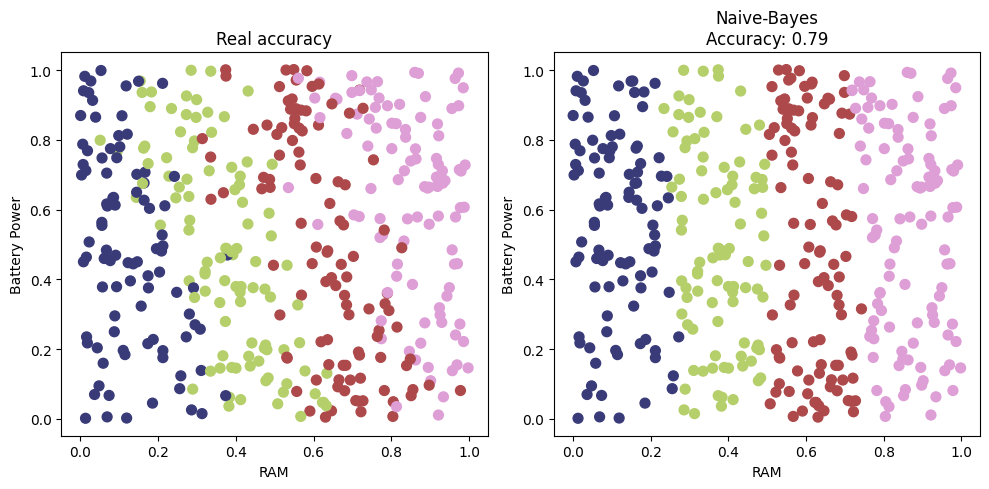

In [14]:
model = GaussianNB()
model.fit(X_train, y_train)

preds = model.predict(X_test)

acc = accuracy_score(y_test, preds)
print(f"Naive-Bayes accuracy: {acc:.2f}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title("Real accuracy")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title(f"Naive-Bayes\nAccuracy: {acc:.2f}")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.tight_layout()
plt.show()

In [15]:
data_all = np.array(data)

data_all = data_all[:,0:20]

ys = np.array(data)[:,20]

X_tr, X_ts, y_tr, y_ts = train_test_split(data_all, ys, test_size=0.2, random_state=3840)

model = GaussianNB()
model.fit(X_tr, y_tr)

preds = model.predict(X_ts)

acc = accuracy_score(y_ts, preds)
print(f"Naive-Bayes accuracy: {acc:.2f}")

Naive-Bayes accuracy: 0.82


In [16]:
data_all = np.array(data[['ram', 'battery_power', 'px_height', 'px_width']])

ys = np.array(data)[:,20]

X_tr, X_ts, y_tr, y_ts = train_test_split(data_all, ys, test_size=0.2, random_state=3840)

model = GaussianNB()
model.fit(X_tr, y_tr)

preds = model.predict(X_ts)

acc = accuracy_score(y_ts, preds)
print(f"Naive-Bayes accuracy: {acc:.2f}")

Naive-Bayes accuracy: 0.81


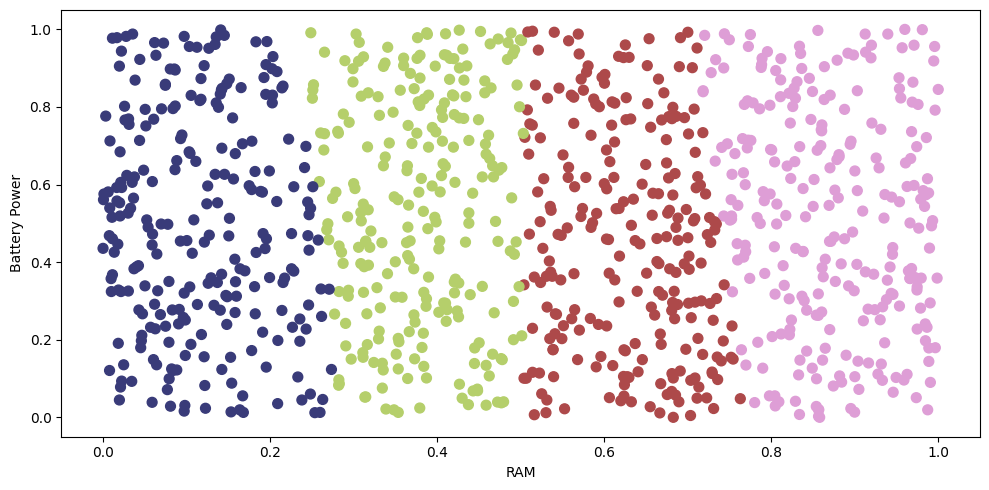

In [17]:
model = GaussianNB()
model.fit(X_train, y_train)

preds = model.predict(X2)

plt.figure(figsize=(10, 5))

plt.scatter(X2[:, 0], X2[:, 1], c=preds, cmap=plt.cm.tab20b, marker='o', s=50)
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.tight_layout()
plt.show()

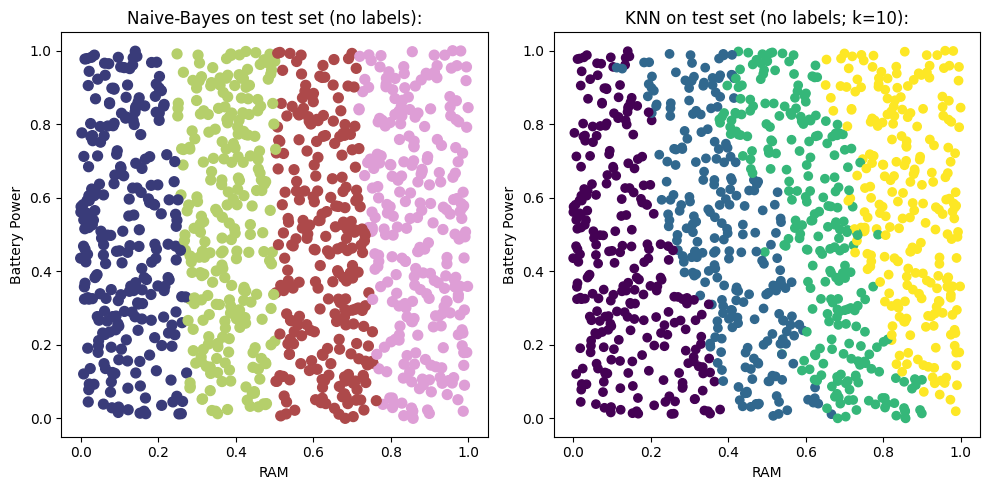

In [18]:
model = GaussianNB()
model.fit(X_train, y_train)

preds = model.predict(X2)

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.scatter(X2[:, 0], X2[:, 1], c=preds, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title("Naive-Bayes on test set (no labels):")
plt.xlabel("RAM")
plt.ylabel("Battery Power")


model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

preds2 = model.predict(X2)


plt.subplot(1,2,2)
plt.scatter(X2[:,0], X2[:,1], c=preds2)
plt.title("KNN on test set (no labels; k=10):")
plt.xlabel("RAM")
plt.ylabel("Battery Power")


plt.tight_layout()
plt.show()

### Neural Network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2024-11-27 23:11:46.815032: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/home/raccielpop/miniconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8565 - loss: 0.4468
Neural network accuracy: 0.83


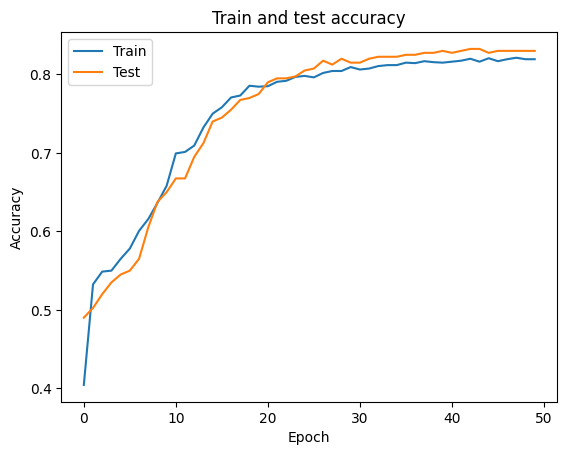

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


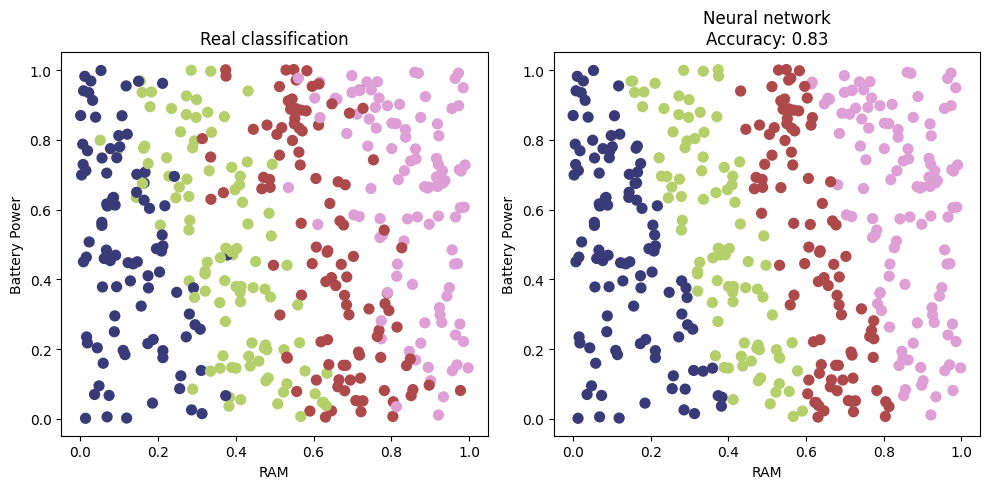

In [20]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

model = Sequential()
model.add(Dense(16, input_dim=2, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_s, y_train_encoded, epochs=50, validation_data=(X_test_s, y_test_encoded), verbose=0)

_, accuracy = model.evaluate(X_test_s, y_test_encoded)
print(f"Neural network accuracy: {accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Train and test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

preds = model.predict(X_test_s)
#print(preds)
preds_classes = np.argmax(preds, axis=1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title("Real classification")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds_classes, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title(f"Neural network\nAccuracy: {history.history['val_accuracy'][len(history.history['val_accuracy'])-1]:.2f}")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.tight_layout()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8483 - loss: 0.4838
Neural netowk accuracy: 0.82


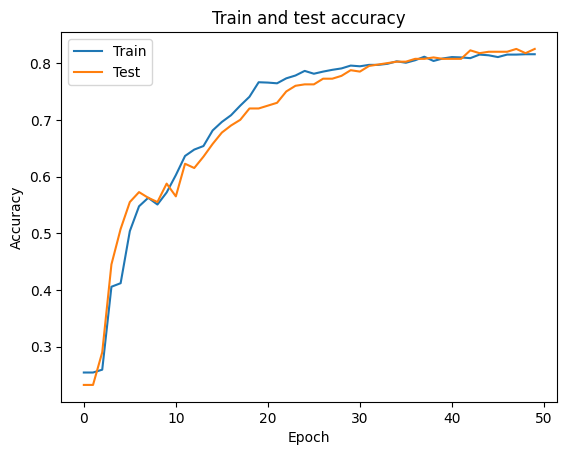

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_s, y_train_encoded, epochs=50, validation_data=(X_test_s, y_test_encoded), verbose=0)

_, accuracy = model.evaluate(X_test_s, y_test_encoded)
print(f"Neural netowk accuracy: {accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Train and test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

preds = model.predict(X_test_s)
preds_classes = np.argmax(preds, axis=1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title("Real classification")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds_classes, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title(f"Neural network\nAccuracy: {history.history['val_accuracy'][len(history.history['val_accuracy'])-1]:.2f}")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.tight_layout()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=2, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_s, y_train_encoded, epochs=50, validation_data=(X_test_s, y_test_encoded), verbose=0)

_, accuracy = model.evaluate(X_test_s, y_test_encoded)
print(f"Neural network accuracy: {accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Train and test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

preds = model.predict(X_test_s)
#print(preds)
preds_classes = np.argmax(preds, axis=1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title("Real classification")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds_classes, cmap=plt.cm.tab20b, marker='o', s=50)
plt.title(f"Neural network\nAccuracy: {history.history['val_accuracy'][len(history.history['val_accuracy'])-1]:.2f}")
plt.xlabel("RAM")
plt.ylabel("Battery Power")

plt.tight_layout()
plt.show()